In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from patchify import patchify,unpatchify
import os
from PIL import Image

In [21]:
regions = ['D029',
           'D014',
           'D059',
           'D072',
           'D056',
           'D022',
           'DD44',
           'D006']

data_path = 'D:/ann_data'

In [3]:
def cut_image(image_name, n = 1_000, m = 1_000):
    return [image_name[x:x + m, y:y + n] for x in range(0, image_name.shape[0], m) for y in range(0, image_name.shape[1], n)]

def random_choice(arr):
    return np.random.choice(len(arr) - 1)

def check_criteria(sub_image):
    
    unique, counts = np.unique(sub_image, return_counts=True)
    perc = counts[len(counts) - 1] / np.sum(counts)
        
    black_idx = np.searchsorted(unique, 255)
        
    if black_idx == len(unique) or perc < 0.9:
        return False
    else:
        return True

        

In [125]:
test = np.array([0, 1, 2, 3, 4, 5, 6])
# len(test)
# test[len(test) - 1]
print(np.searchsorted(test, 10))

7


In [154]:
for code in regions[:1]:
    for root, dirs, files in os.walk(data_path + '/' + code):
        print(f'Region: {code}, Number of Satellite images: {len(files)}')
        for img in files:
            
            image = rasterio.open(data_path + '/' + code + '/' + img)
            
            mask = None
            
            try:
                mask = rasterio.open(data_path + '/labels/' + code + '/' + img[:-8] + '_UA2012.tif')
                
            except: 
                pass
            
            if image.width == image.height == 10_000:
                
                image = image.read()
                image = reshape_as_image(image)
                sub_images = cut_image(image)
                
                criteria = True
                
                while criteria:
                    sub_tile_idx = random_choice(sub_images)
                
                    criteria = check_criteria(sub_images[sub_tile_idx])
                    print(img, criteria)
                    
                sub_image = Image.fromarray(sub_images[sub_tile_idx])
                image_code = img[8:17]
                sub_image.save(f'../data/{code}_{image_code}_{sub_tile_idx}.tif')
                print(mask)
                
                if mask is not None and mask.width == mask.height == 10_000:
                    
                    mask = mask.read()
                    mask = reshape_as_image(mask)
                    sub_masks = cut_image(mask)
                    
                    sub_mask = Image.fromarray(np.squeeze(sub_masks[sub_tile_idx], axis = 2))
                    
                    sub_mask.save(f'../data/{code}_{image_code}_{sub_tile_idx}_mask.tif')
                    
                
                
            # print(img[6:], sub_tile_idx)
                
            else:
                print(f'Error: {img}')


Region: D029, Number of Satellite images: 377
29-2012-0160-6835-LA93-0M50-E080.jp2.tif False
<open DatasetReader name='D:/ann_data/labels/D029/29-2012-0160-6835-LA93-0M50-E080_UA2012.tif' mode='r'>
29-2012-0155-6840-LA93-0M50-E080.jp2.tif False
<open DatasetReader name='D:/ann_data/labels/D029/29-2012-0155-6840-LA93-0M50-E080_UA2012.tif' mode='r'>
29-2012-0165-6835-LA93-0M50-E080.jp2.tif False
<open DatasetReader name='D:/ann_data/labels/D029/29-2012-0165-6835-LA93-0M50-E080_UA2012.tif' mode='r'>


KeyboardInterrupt: 

In [4]:
mask = rasterio.open('D:/ann_data/labels/D029/29-2012-0160-6835-LA93-0M50-E080_UA2012.tif')
mask = mask.read()
mask = reshape_as_image(mask)
sub_masks = cut_image(mask)
sub_mask = sub_masks[17]
sub_mask.shape

(1000, 1000, 1)

In [20]:
import numpy

np.unique(rasterio.open("C:/Users\edvar\PycharmProjects\miniFrance_project\data/train_masks\mask_D006_1000-6340_16.tif").read())

array([ 5,  7, 10, 11, 12], dtype=uint8)

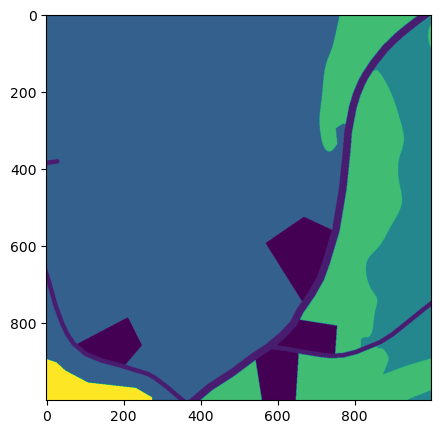

In [6]:
plt.figure(figsize=(5, 5))

plt.imshow(sub_mask, )

plt.show()

C:\Users\edvar\miniconda3\envs\miniFrance_project\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


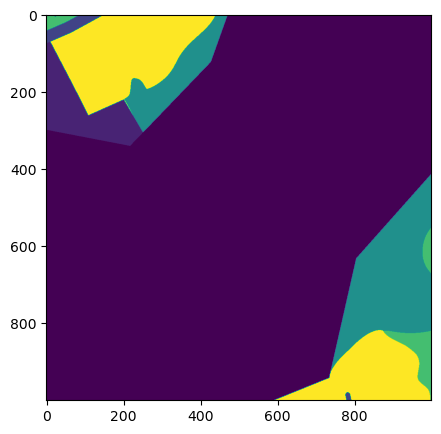

In [137]:
string = '29-2012-0160-6835-LA93-0M50-E080.jp2.tif'
string[8:17]

'0160-6835'

In [81]:
lst = '123456'
lst[:-3]

'123'

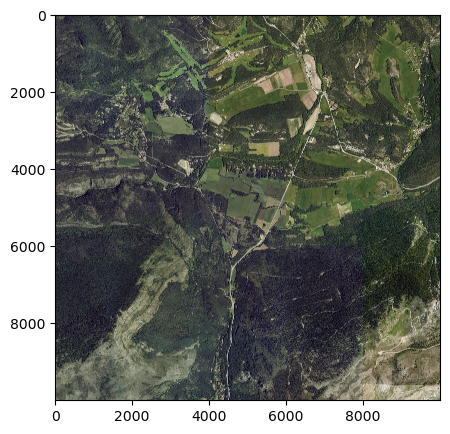

In [47]:
image_array = dataset.read()
image_array = reshape_as_image(image_array)

plt.figure(figsize=(5, 5))

plt.imshow(image_array)

plt.show()

In [48]:
image_array.shape

(10000, 10000, 3)

In [59]:
im = image_array
M = 1_000
N = 1_000

tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

In [64]:
for i in tiles:
    
    # plt.figure(figsize=(5, 5))
    # 
    # plt.imshow(i)
    # 
    # plt.show()
    print(i.shape)


(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1

In [65]:
test = Image.fromarray(image_array)

In [43]:
type(test)

PIL.Image.Image

In [58]:
test[0:1000, 0:1000]

TypeError: 'Image' object is not subscriptable

In [6]:
mask = rasterio.open('D:/ann_data/labels/D029/29-2012-0160-6835-LA93-0M50-E080_UA2012.tif')
print(mask.width, mask.height)
mask_array = mask.read()

10000 10000


In [7]:
dataset = rasterio.open("D:/ann_data\D029/29-2012-0160-6835-LA93-0M50-E080.jp2.tif")
print(dataset.width, dataset.height)

image_array = dataset.read()

10000 10000


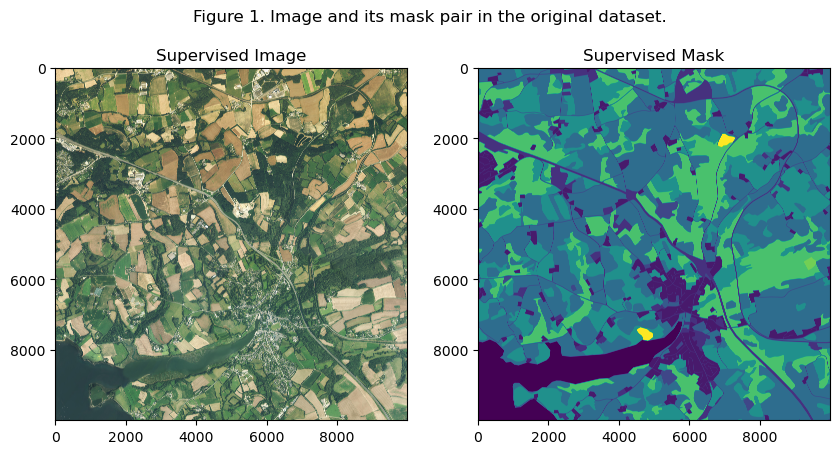

In [19]:
dataset = rasterio.open("D:/ann_data\D029/29-2012-0160-6835-LA93-0M50-E080.jp2.tif")
image_array = dataset.read()
mask = rasterio.open('D:/ann_data/labels/D029/29-2012-0160-6835-LA93-0M50-E080_UA2012.tif')
mask_array = mask.read()

image_array = reshape_as_image(image_array)
mask_array = reshape_as_image(mask_array)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

fig.suptitle('Figure 1. Image and its mask pair in the original dataset.', y = 0.73)
axes[0].imshow(image_array)
axes[0].set_title("Supervised Image")
axes[1].imshow(mask_array)
axes[1].set_title("Supervised Mask")
plt.show()

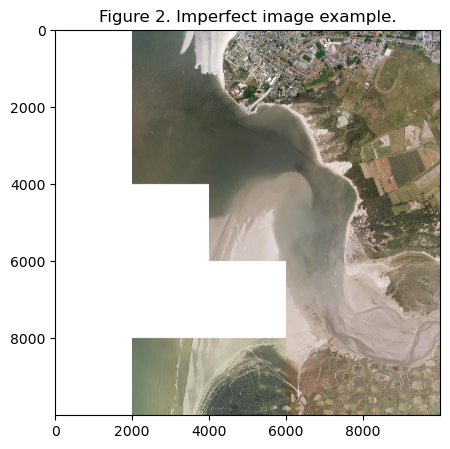

In [22]:
dataset = rasterio.open("D:/ann_data\D062/62-2012-0595-7035-LA93-0M50-E080.jp2.tif")
image_array = dataset.read()
image_array = reshape_as_image(image_array)

plt.figure(figsize=(5, 5))

plt.title("Figure 2. Imperfect image example.")

plt.imshow(image_array)

plt.show()

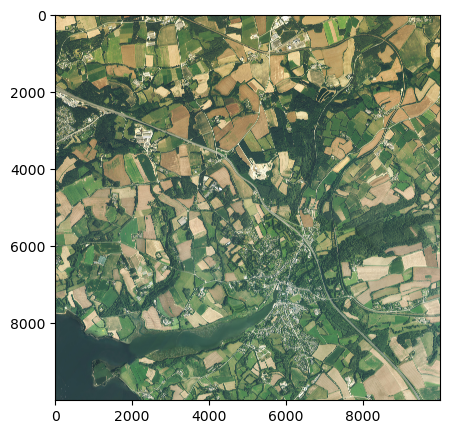

In [9]:
image_array = reshape_as_image(image_array)

plt.figure(figsize=(5, 5))

plt.imshow(image_array)

plt.show()

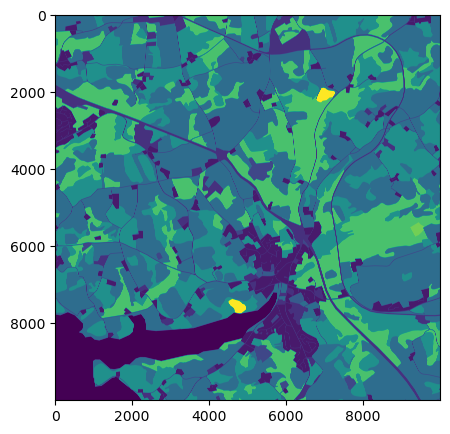

In [10]:
mask_array = reshape_as_image(mask_array)

plt.figure(figsize=(5, 5))

plt.imshow(mask_array)

plt.show()

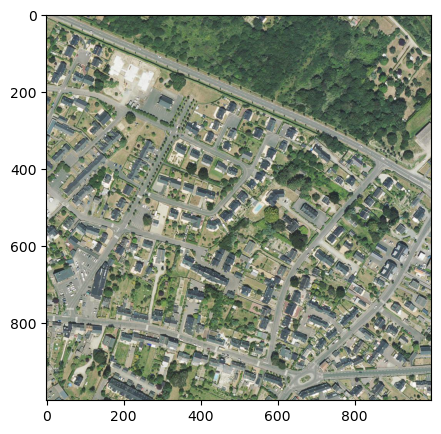

[[0.000e+00 4.649e-06]
 [1.000e+00 1.013e-06]
 [2.000e+00 2.980e-06]
 [3.000e+00 1.013e-06]
 [4.000e+00 5.007e-06]
 [5.000e+00 4.351e-06]
 [6.000e+00 4.351e-06]
 [7.000e+00 5.305e-06]
 [8.000e+00 7.689e-06]
 [9.000e+00 1.168e-05]
 [1.000e+01 7.689e-06]
 [1.100e+01 1.132e-05]
 [1.200e+01 1.699e-05]
 [1.300e+01 2.331e-05]
 [1.400e+01 2.003e-05]
 [1.500e+01 2.635e-05]
 [1.600e+01 3.564e-05]
 [1.700e+01 3.767e-05]
 [1.800e+01 5.865e-05]
 [1.900e+01 6.700e-05]
 [2.000e+01 7.302e-05]
 [2.100e+01 9.269e-05]
 [2.200e+01 1.097e-04]
 [2.300e+01 1.450e-04]
 [2.400e+01 1.507e-04]
 [2.500e+01 1.930e-04]
 [2.600e+01 2.151e-04]
 [2.700e+01 2.656e-04]
 [2.800e+01 3.033e-04]
 [2.900e+01 3.643e-04]
 [3.000e+01 4.237e-04]
 [3.100e+01 4.523e-04]
 [3.200e+01 5.589e-04]
 [3.300e+01 6.285e-04]
 [3.400e+01 7.305e-04]
 [3.500e+01 7.892e-04]
 [3.600e+01 8.907e-04]
 [3.700e+01 1.007e-03]
 [3.800e+01 1.127e-03]
 [3.900e+01 1.216e-03]
 [4.000e+01 1.397e-03]
 [4.100e+01 1.561e-03]
 [4.200e+01 1.669e-03]
 [4.300e+01

In [118]:
image = reshape_as_image(image_array)
sub_images = cut_image(image)
                
sub_tile_idx = random_choice(sub_images)

plt.figure(figsize=(5, 5))

plt.imshow(sub_images[sub_tile_idx])

plt.show()

unique, counts = np.unique(sub_images[sub_tile_idx], return_counts=True)
perc = counts / np.sum(counts)
print(np.asarray((unique, perc), dtype=np.float16).T)
print(perc)

In [93]:
for i in sub_images:
    # plt.figure(figsize=(5, 5))
    # 
    # plt.imshow(i)
    # 
    # plt.show()
    # print(np.unique(i))

[255]
[255]
[255]
[251 252 253 254 255]
[  3   4   7   8   9  10  11  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 207 208 209 210 212 213 214 216 217 218 219 221 223 229 231 234
 236]
[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19 

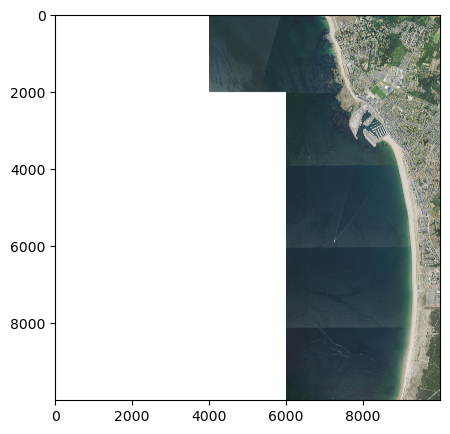

In [89]:
plt.figure(figsize=(5, 5))

plt.imshow(image_array.transpose(1, 2, 0))

plt.show()

In [90]:
image_array

array([[[255, 255, 255, ..., 186, 181, 181],
        [255, 255, 255, ..., 188, 183, 181],
        [255, 255, 255, ..., 191, 186, 183],
        ...,
        [255, 255, 255, ...,  38,  57,  75],
        [255, 255, 255, ...,  35,  54,  67],
        [255, 255, 255, ...,  44,  55,  54]],

       [[255, 255, 255, ..., 172, 167, 167],
        [255, 255, 255, ..., 174, 169, 167],
        [255, 255, 255, ..., 177, 172, 169],
        ...,
        [255, 255, 255, ...,  42,  63,  84],
        [255, 255, 255, ...,  38,  59,  72],
        [255, 255, 255, ...,  47,  58,  59]],

       [[255, 255, 255, ..., 146, 141, 141],
        [255, 255, 255, ..., 148, 143, 141],
        [255, 255, 255, ..., 151, 146, 143],
        ...,
        [255, 255, 255, ...,  43,  63,  83],
        [255, 255, 255, ...,  43,  62,  75],
        [255, 255, 255, ...,  52,  63,  63]]], dtype=uint8)

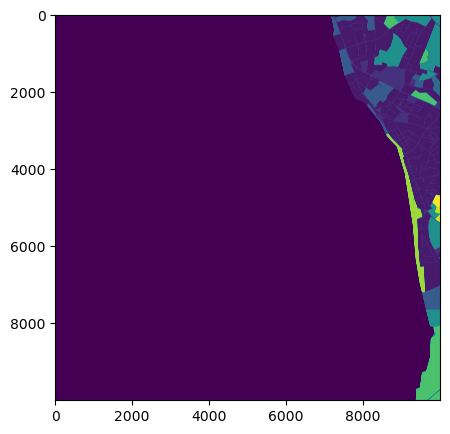

In [5]:
mask = rasterio.open("D:/ann_data\labels\D044/44-2013-0280-6710-LA93-0M50-E080_UA2012.tif")

mask_array = mask.read()

plt.figure(figsize=(5, 5))

plt.imshow(mask_array.transpose(1, 2, 0))

plt.show()

In [6]:
mask_array

array([[[ 0,  0,  0, ...,  7,  7,  7],
        [ 0,  0,  0, ...,  7,  7,  7],
        [ 0,  0,  0, ...,  7,  7,  7],
        ...,
        [ 0,  0,  0, ..., 10, 10, 10],
        [ 0,  0,  0, ..., 10, 10, 10],
        [ 0,  0,  0, ..., 10, 10, 10]]], dtype=uint8)

In [ ]:
def check_criteria(sub_image):
    
    unique, counts = np.unique(sub_image, return_counts=True)
    perc = counts[len(counts) - 1] / np.sum(counts)
        
    black_idx = np.searchsorted(unique, 255)
        
    if black_idx == len(unique) or perc < 0.9:
        return False
    else:
        return True

In [164]:
t = np.array([1, 2, 3, 4, 5, 6, 7])
print(t[len(t)-1])

7


In [167]:
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from patchify import patchify,unpatchify
import os
from PIL import Image

#Constants
DATA_PATH = 'D:/ann_data'
IMAGE_SIZE = 10_000
PATCH_SIZE = 1_000
REGIONS = ['D029',
           'D014',
           'D059',
           'D072',
           'D056',
           'D022',
           'DD44',
           'D006']


def cut_image(image_name, n=1_000, m=1_000):
    return [image_name[x:x + m, y:y + n] for x in range(0, image_name.shape[0], m) for y in
            range(0, image_name.shape[1], n)]

def random_index(arr):
    return np.random.randint(0, len(arr) - 1)

def meets_criteria(sub_image, threshold = 0.9):
    unique, counts = np.unique(sub_image, return_counts=True)
    perc = counts[-1] / np.sum(counts)
    
    if unique[-1] != 255 or perc < 0.9:
        return True
    else:
        return False

for code in REGIONS[:1]:
    for root, dirs, files in os.walk(os.path.join(DATA_PATH, code)):
        print(f'Region: {code}, Number of Satellite images: {len(files)}')
        for img in files:

            image = rasterio.open(os.path.join(DATA_PATH, code, img))
            mask = None

            try:
                mask = rasterio.open(os.path.join(DATA_PATH, 'labels', code, img[:-8] + '_UA2012.tif'))

            except:
                pass

            if image.width == image.height == IMAGE_SIZE:

                image = reshape_as_image(image.read())
                sub_images = cut_image(image)

                criteria_met = False
                while not criteria_met:
                    sub_tile_idx = random_index(sub_images)
                    criteria_met = meets_criteria(sub_images[sub_tile_idx])
                    
                sub_image = Image.fromarray(sub_images[sub_tile_idx])
                image_code = img[8:17]
                sub_image.save(f'../data/{code}_{image_code}_{sub_tile_idx}.tif')

                if mask and mask.width == mask.height == IMAGE_SIZE:
                    mask = reshape_as_image(mask.read())
                    sub_masks = cut_image(mask)

                    sub_mask = Image.fromarray(np.squeeze(sub_masks[sub_tile_idx], axis=2))

                    sub_mask.save(f'../data/{code}_{image_code}_{sub_tile_idx}_mask.tif')
                print(image_code)
            else:
                print(f'Error: {img}') 

Region: D029, Number of Satellite images: 377
0160-6835
0155-6840
0165-6835
0220-6775
0155-6870
0140-6815


KeyboardInterrupt: 

In [189]:
from glob import glob
DATA_PATH = 'D:/ann_data'
all_files = glob(f"{DATA_PATH}/*/*.tif")

In [190]:
all_files

['D:/ann_data\\D072\\72-2013-0455-6745-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0490-6740-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0505-6760-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0465-6795-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0460-6740-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0485-6810-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0460-6745-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0495-6750-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0485-6730-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0465-6805-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0490-6780-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0470-6770-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0460-6795-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0450-6760-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0455-6780-LA93-0M50-E080.jp2.tif',
 'D:/ann_data\\D072\\72-2013-0465-6790-L

In [191]:
mask_path = os.path.join(DATA_PATH, 'labels', 'DO56', '2034_UA2012.tif')
mask_path

'D:/ann_data\\labels\\DO56\\2034_UA2012.tif'